In [57]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
import sympy as sy
from sympy import solve

In [58]:
#Defining the ODE
alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6 = sy.symbols("alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6")
def func(PM,t,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6):
    P,Pb,Pu,S = PM
    dPdt = 1 - alpha_1*P - S*P + Pb
    dPbdt = alpha_1*alpha_3*P + alpha_3*S*P - alpha_3*Pb - Pb
    dPudt = Pb - alpha_6*Pu
    dSdt = -alpha_2*S*P + alpha_2*Pb + (alpha_2/alpha_3)*Pb - (alpha_4*S)/(alpha_5+S)
    dydt = [dPdt, dPbdt, dPudt, dSdt]
    return dydt

In [59]:
#Defining symbolic differential equations
P,Pb,Pu,S,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6 = sy.symbols("P,Pb,Pu,S,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6")
dPdt = 1 - alpha_1*P - S*P + Pb
dPbdt = alpha_1*alpha_3*P + alpha_3*S*P - alpha_3*Pb - Pb
dPudt = Pb - alpha_6*Pu
dSdt = -alpha_2*S*P + alpha_2*Pb + (alpha_2/alpha_3)*Pb - (alpha_4*S)/(alpha_5+S)

#Solving for the steady state
solution = sy.solve([dPdt,dPbdt,dPudt,dSdt],[P,Pb,Pu,S],dict=True)
print(solution[0][P])
print(solution[0][Pb])
print(solution[0][Pu])
print(solution[0][S])

#Creating lambdified functions of ach solution
P = sy.lambdify([alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6],solution[0][P],"numpy")
Pb = sy.lambdify([alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6],solution[0][Pb],"numpy")
Pu = sy.lambdify([alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6],solution[0][Pu],"numpy")
S = sy.lambdify([alpha_1,alpha_2,alpha_3,alpha_4,alpha_5,alpha_6],solution[0][S],"numpy")

(alpha_1*alpha_2*alpha_3 + alpha_1*alpha_2 + alpha_1*alpha_4 - sqrt(alpha_1*(alpha_1*alpha_2**2*alpha_3**2 + 2*alpha_1*alpha_2**2*alpha_3 + alpha_1*alpha_2**2 - 2*alpha_1*alpha_2*alpha_3*alpha_4 - 2*alpha_1*alpha_2*alpha_4 + alpha_1*alpha_4**2 + 4*alpha_2*alpha_3*alpha_4*alpha_5 + 4*alpha_2*alpha_4*alpha_5)))/(2*alpha_1*alpha_2*(alpha_1 - alpha_5))
alpha_3
alpha_3/alpha_6
(alpha_1*(alpha_2*alpha_3 + alpha_2 - alpha_4) + sqrt(alpha_1*(alpha_1*alpha_2**2*alpha_3**2 + 2*alpha_1*alpha_2**2*alpha_3 + alpha_1*alpha_2**2 - 2*alpha_1*alpha_2*alpha_3*alpha_4 - 2*alpha_1*alpha_2*alpha_4 + alpha_1*alpha_4**2 + 4*alpha_2*alpha_3*alpha_4*alpha_5 + 4*alpha_2*alpha_4*alpha_5)))/(2*alpha_4)


In [5]:
#Defining Dimensional Variables
a = 1
Ap = 314
j = 10**2
Kd = 0.74
Km = 2.5
k = j/Kd
Se = 0.1
vm = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002

#Defining Nondimensional Variables
a1 = (k*Se)/a
a2 = (Ap*y*k)/(a**2*V*W)
a3 = j/a
a4 = (k*vm)/(a**2*V*W)
a5 = (k*Km)/(a*W)
a6 = z/a

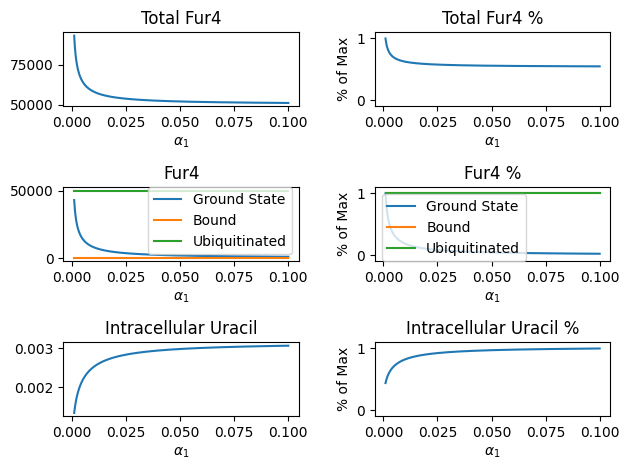

In [51]:
#Changes in a1

res = 1000

fig, ax = plt.subplots(3,2)
a1_domain = np.linspace(0.001,.1,res)

P_sol  = P(a1_domain,a2,a3,a4,a5,a6)
Pb_sol = np.array([Pb(a1_domain,a2,a3,a4,a5,a6) for _ in range(res)])
Pu_sol = np.array([Pu(a1_domain,a2,a3,a4,a5,a6) for _ in range(res)])
S_sol  = S(a1_domain,a2,a3,a4,a5,a6)

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a1_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_1$")

#Plotting Individual Fur4
ax[1,0].plot(a1_domain, P_sol, label = "Ground State")
ax[1,0].plot(a1_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a1_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_1$")

#Plotting Intracellular Uracil
ax[2,0].plot(a1_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_1$")


#Plotting total Fur4 %
ax[0,1].plot(a1_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_1$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a1_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a1_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a1_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_1$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a1_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_1$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()

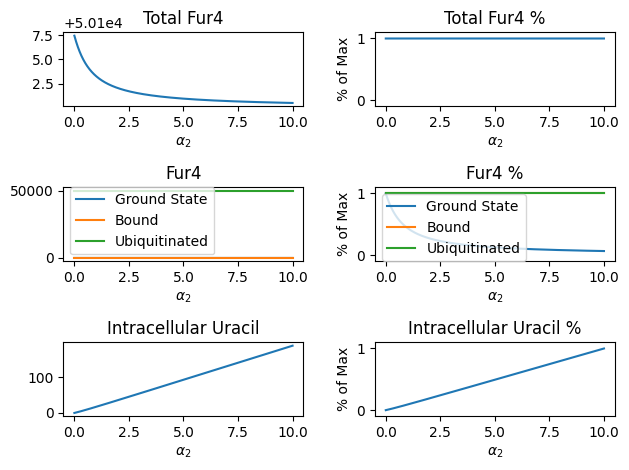

In [52]:
#Changes in a2

res = 1000

fig, ax = plt.subplots(3,2)
a2_domain = np.linspace(0.001,10,res)

P_sol  = P(a1,a2_domain,a3,a4,a5,a6)
Pb_sol = np.array([Pb(a1,a2_domain,a3,a4,a5,a6) for _ in range(res)])
Pu_sol = np.array([Pu(a1,a2_domain,a3,a4,a5,a6) for _ in range(res)])
S_sol  = S(a1,a2_domain,a3,a4,a5,a6)

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a2_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_2$")

#Plotting Individual Fur4
ax[1,0].plot(a2_domain, P_sol, label = "Ground State")
ax[1,0].plot(a2_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a2_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_2$")

#Plotting Intracellular Uracil
ax[2,0].plot(a2_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_2$")


#Plotting total Fur4 %
ax[0,1].plot(a2_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_2$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a2_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a2_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a2_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_2$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a2_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_2$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()

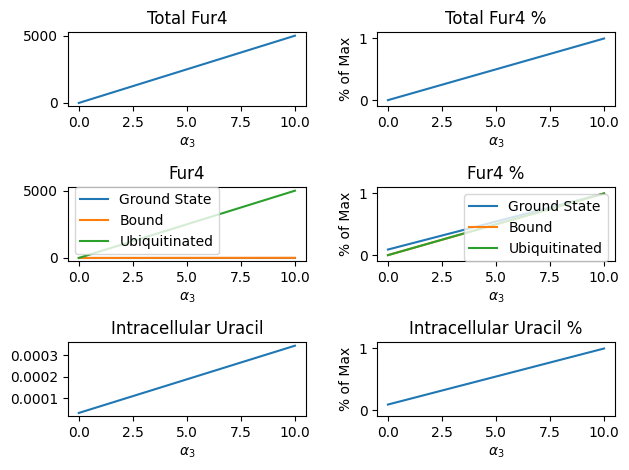

In [56]:
#Changes in a3

res = 1000

fig, ax = plt.subplots(3,2)
a3_domain = np.linspace(0.001,10,res)

P_sol  = P(a1,a2,a3_domain,a4,a5,a6)
Pb_sol = Pb(a1,a2,a3_domain,a4,a5,a6)
Pu_sol = Pu(a1,a2,a3_domain,a4,a5,a6)
S_sol  = S(a1,a2,a3_domain,a4,a5,a6)

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a3_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_3$")

#Plotting Individual Fur4
ax[1,0].plot(a3_domain, P_sol, label = "Ground State")
ax[1,0].plot(a3_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a3_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_3$")

#Plotting Intracellular Uracil
ax[2,0].plot(a3_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_3$")


#Plotting total Fur4 %
ax[0,1].plot(a3_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_3$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a3_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a3_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a3_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_3$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a3_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_3$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()

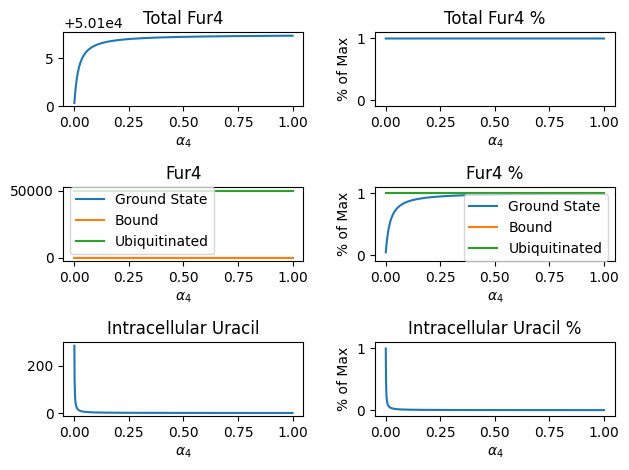

In [48]:
#Changes in a4

res = 1000

fig, ax = plt.subplots(3,2)
a4_domain = np.linspace(0.001,1,res)

P_sol  = P(a1,a2,a3,a4_domain,a5,a6)
Pb_sol = np.array([Pb(a1,a2,a3,a4_domain,a5,a6) for _ in range(res)])
Pu_sol = np.array([Pu(a1,a2,a3,a4_domain,a5,a6) for _ in range(res)])
S_sol  = S(a1,a2,a3,a4_domain,a5,a6)

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a4_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_4$")

#Plotting Individual Fur4
ax[1,0].plot(a4_domain, P_sol, label = "Ground State")
ax[1,0].plot(a4_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a4_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_4$")

#Plotting Intracellular Uracil
ax[2,0].plot(a4_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_4$")



#Plotting total Fur4 %
ax[0,1].plot(a4_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_4$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a4_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a4_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a4_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_4$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a4_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_4$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()


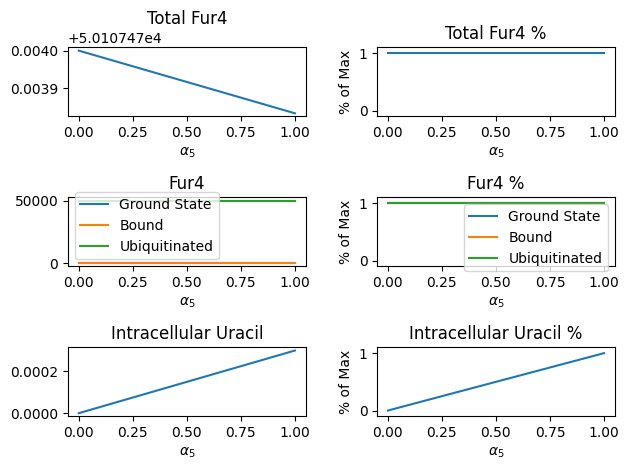

In [49]:
#Changes in a5

res = 1000

fig, ax = plt.subplots(3,2)
a5_domain = np.linspace(0.001,1,res)

P_sol  = P(a1,a2,a3,a4,a5_domain,a6)
Pb_sol = np.array([Pb(a1,a2,a3,a4,a5_domain,a6) for _ in range(res)])
Pu_sol = np.array([Pu(a1,a2,a3,a4,a5_domain,a6) for _ in range(res)])
S_sol  = S(a1,a2,a3,a4,a5_domain,a6)

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a5_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_5$")

#Plotting Individual Fur4
ax[1,0].plot(a5_domain, P_sol, label = "Ground State")
ax[1,0].plot(a5_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a5_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_5$")

#Plotting Intracellular Uracil
ax[2,0].plot(a5_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_5$")


#Plotting total Fur4 %
ax[0,1].plot(a5_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_5$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a5_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a5_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a5_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_5$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a5_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_5$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()

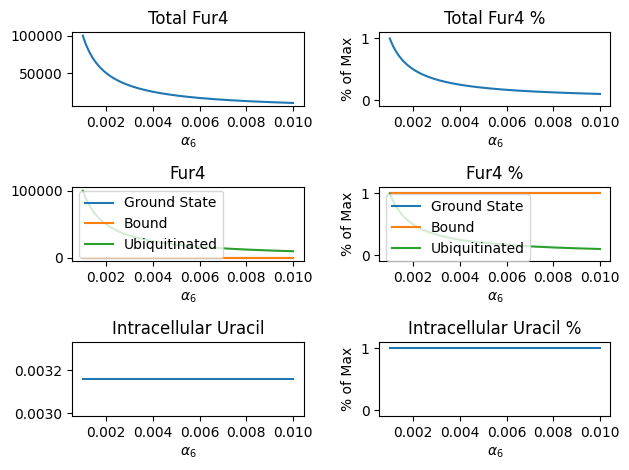

In [50]:
#Changes in a6

res = 1000

fig, ax = plt.subplots(3,2)
a6_domain = np.linspace(0.001,.01,res)

P_sol  = np.array([P(a1,a2,a3,a4,a5,a6_domain) for _ in range(res)])
Pb_sol = np.array([Pb(a1,a2,a3,a4,a5,a6_domain) for _ in range(res)])
Pu_sol = Pu(a1,a2,a3,a4,a5,a6_domain)
S_sol  = [S(a1,a2,a3,a4,a5,a6_domain) for _ in range(res)]

P_tot_sol = P_sol+Pb_sol+Pu_sol
#Plotting total Fur4
ax[0,0].plot(a6_domain, P_tot_sol)
ax[0,0].set_title("Total Fur4")
ax[0,0].set_xlabel(r"$\alpha_6$")

#Plotting Individual Fur4
ax[1,0].plot(a6_domain, P_sol, label = "Ground State")
ax[1,0].plot(a6_domain, Pb_sol, label = "Bound")
ax[1,0].plot(a6_domain, Pu_sol, label = "Ubiquitinated")
ax[1,0].set_title("Fur4")
ax[1,0].legend()
ax[1,0].set_xlabel(r"$\alpha_6$")

#Plotting Intracellular Uracil
ax[2,0].plot(a6_domain, S_sol)
ax[2,0].set_title("Intracellular Uracil")
ax[2,0].set_xlabel(r"$\alpha_6$")


#Plotting total Fur4 %
ax[0,1].plot(a6_domain, P_tot_sol/max(P_tot_sol))
ax[0,1].set_title("Total Fur4 %")
ax[0,1].set_xlabel(r"$\alpha_6$")
ax[0,1].set_ylabel(r"% of Max")
ax[0,1].axis(ymin=-.1,ymax=1.1)

#Plotting Individual Fur4 %
ax[1,1].plot(a6_domain, P_sol/max(P_sol), label = "Ground State")
ax[1,1].plot(a6_domain, Pb_sol/max(Pb_sol), label = "Bound")
ax[1,1].plot(a6_domain, Pu_sol/max(Pu_sol), label = "Ubiquitinated")
ax[1,1].set_title("Fur4 %")
ax[1,1].legend()
ax[1,1].set_xlabel(r"$\alpha_6$")
ax[1,1].set_ylabel(r"% of Max")
ax[1,1].axis(ymin=-.1,ymax=1.1)

#Plotting Intracellular Uracil %
ax[2,1].plot(a6_domain, S_sol/max(S_sol))
ax[2,1].set_title("Intracellular Uracil %")
ax[2,1].set_xlabel(r"$\alpha_6$")
ax[2,1].set_ylabel(r"% of Max")
ax[2,1].axis(ymin=-.1,ymax=1.1)

plt.tight_layout()
plt.show()